In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_error
from scipy.stats import ttest_ind
from scipy.stats import shapiro, anderson, kstest, norm

#data = pd.read_csv('data/wnba_train_over_under_data.csv')
df= pd.read_csv('data/wnba_train_regression.csv')
OU = df['OU Result']
df.drop(['OU Result'], axis=1, inplace=True)

class_counts = OU.value_counts()
print(class_counts)
# Calculate under rate
# 59% under rate

# Residuals

# Print point
df["Difference"] = df["Points"] - df["L10 Median"]
df["Kalman Difference"] = df["Kalman"] - df["L10 Median"]
df["Relative Strength"] = df["My PPG"] - df["Opponent PPG"]
print(df.describe())


print(df[df["Difference"] > 5])


OU Result
0.0    285
1.0    195
Name: count, dtype: int64
       L10 Median      Kalman  Relative Performance   Rest Days    Recent T  \
count  480.000000  480.000000            466.000000  480.000000  480.000000   
mean    15.572917   15.726054             -1.141341    2.668750    0.029758   
std      4.353135    4.371551             11.502775    1.130643    0.693604   
min      7.000000    6.422565            -41.200000    1.000000   -2.647307   
25%     12.500000   12.700209             -8.111111    2.000000   -0.389404   
50%     15.000000   15.056128             -0.241597    2.000000    0.000000   
75%     18.625000   18.506949              7.636364    3.000000    0.397701   
max     32.000000   29.872336             21.142857    8.000000    3.255842   

       Opponent PPG      My PPG      Points        Line  Difference  \
count    480.000000  480.000000  480.000000  480.000000  480.000000   
mean      81.174187   81.743454   15.054167   15.793750   -0.518750   
std        4.0279

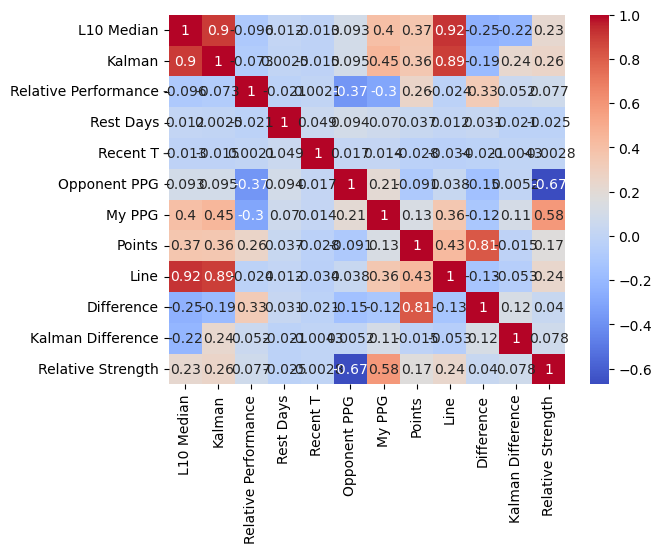

In [2]:
# Correlation matrix
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


In [59]:

# Perform independent samples t-test
# Statitical difference between home and away games avarage?

# Is there a significant difference between players that seem to be doing well recently
# No lmao 
cutoff = 1.2
points_home_0 = df[df["Recent T"] <= cutoff]["Difference"].values
points_home_1 = df[df["Recent T"] > cutoff]["Difference"].values
print(len(points_home_0), len(points_home_1))
t_stat, p_value = ttest_ind(np.array(points_home_0), np.array(points_home_1))
print(t_stat)
print(p_value)

# Rest Days t-test
days = 3
points_home_0 = df[df["Rest Days"] <= days]["Difference"].values
points_home_1 = df[df["Rest Days"] > days]["Difference"].values
print(len(points_home_0), len(points_home_1))
t_stat, p_value = ttest_ind(np.array(points_home_0), np.array(points_home_1))
print(t_stat)
print(p_value)

# Kolmogorov-Smirnov Test
data = np.array(df['Difference'])
kstest_stat, kstest_p = kstest(data, 'norm', args=(np.mean(data), np.std(data)))
print(f'Kolmogorov-Smirnov Test: Statistic={kstest_stat}, p-value={kstest_p}')
if kstest_p > 0.05:
    print("Sample looks Gaussian (fail to reject H0)")
else:
    print("Sample does not look Gaussian (reject H0)")

# Residuals are roughly normally distributed, but p = 0.19


"""

# Calculate the correlation between Rest Days and Difference
correlation = df['My PPG'].corr(df['Difference'])
print(f"Correlation between Rest Days and Difference (L10 Median - Points): {correlation}")

# Basic info and statistics
print(df.info())
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Visualizations
# Histograms
df.hist(bins=30, figsize=(10, 10))
plt.show()

# Boxplots
df.boxplot(column=['Points', 'Minutes Diff', 'Opponent PPG', 'Rest Days'], figsize=(10, 6))
plt.show()


# Scatter plots


sns.pairplot(df, x_vars=['Points', 'Minutes Diff', 'Rest Days', 'Recent T'], y_vars='OU Result', height=5, aspect=0.8)
plt.show()

# Bar plot for the categorical variable 'Home'
sns.barplot(x='Home', y='OU Result', data=df)
plt.show()
"""

439 20
1.2783793010917035
0.20176458511866424
372 87
-0.9784421925207041
0.3283733322819351
Kolmogorov-Smirnov Test: Statistic=0.06283849438837641, p-value=0.05104154541722572
Sample looks Gaussian (fail to reject H0)


'\n\nprint(mean_absolute_error(df[\'Points\'], df[\'Line\']))\n\n# Plot the difference against Rest Days\nplt.figure(figsize=(10, 6))\nsns.scatterplot(data=df, x=\'Rest Days\', y=\'Difference\')\nplt.title(\'Difference between L10 Median and Points vs Rest Days\')\nplt.xlabel(\'Rest Days\')\nplt.ylabel(\'Difference (L10 Median - Points)\')\nplt.show()\n\n# Calculate the correlation between Rest Days and Difference\ncorrelation = df[\'My PPG\'].corr(df[\'Difference\'])\nprint(f"Correlation between Rest Days and Difference (L10 Median - Points): {correlation}")\n\n# Basic info and statistics\nprint(df.info())\nprint(df.describe())\n\n# Check for missing values\nprint(df.isnull().sum())\n\n# Visualizations\n# Histograms\ndf.hist(bins=30, figsize=(10, 10))\nplt.show()\n\n# Boxplots\ndf.boxplot(column=[\'Points\', \'Minutes Diff\', \'Opponent PPG\', \'Rest Days\'], figsize=(10, 6))\nplt.show()\n\n\n# Scatter plots\n\n\nsns.pairplot(df, x_vars=[\'Points\', \'Minutes Diff\', \'Rest Days\', \'

In [3]:
# Estimate median absolute error for all estimators
print(f"Kalman Error: {mean_absolute_error(df['Points'], df['Kalman'])}")
print(f"Line Error: {mean_absolute_error(df['Points'], df['L10 Median'])}")
print(f"L10 Median Error: {mean_absolute_error(df['Points'], df['Line'])}")

# L10 Median is a LESS BIASED estimator of the median of points than the line itself LMFAO

Kalman Error: 5.557423440158459
Line Error: 5.454166666666667
L10 Median Error: 5.3


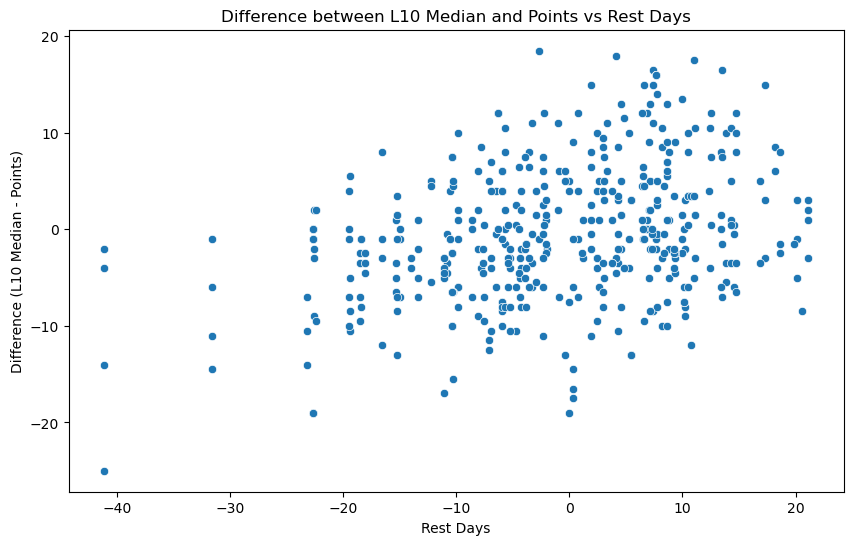

In [58]:

# Plot the difference against Rest Days
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Relative Performance', y='Difference')
plt.title('Difference between L10 Median and Points vs Rest Days')
plt.xlabel('Rest Days')
plt.ylabel('Difference (L10 Median - Points)')
plt.show()

# Relative performance vs team performance
# We should really be seeing a PARABOLIC trend -- player performance is maximized if it is a close game (i.e. points = -10 to 10) and minimized otherwise (points = 20 and above)

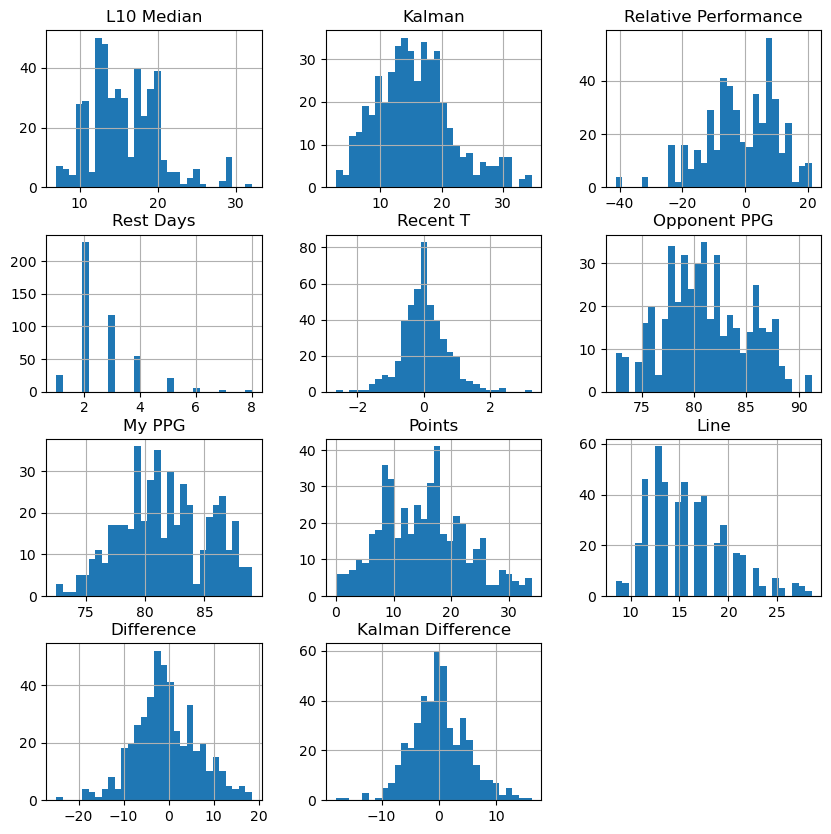

In [55]:
# Histograms
df.hist(bins=30, figsize=(10, 10))
plt.show()